<a href="https://colab.research.google.com/github/marcmore/covid/blob/main/projeto/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Covid**

##Estudo e previsões dos dados de covid 19 da cidade de São José dos Campos

Importando o dataset dos casos de covid do estado de São Paulo.

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("https://github.com/marcmore/covid/blob/main/Dados/dados_covid_sp.zip?raw=true", compression='zip',sep=";")
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [3]:
dados['datahora'] = pd.to_datetime(dados['datahora'],format='%Y-%m-%d')

In [4]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

O gráfico abaixo mostra a evolução dos números de casos de covid 19 no estado de São Paulo.
A linha azul escura central representa a média dos casos diários de todos os municípios do estado de São Paulo enquanto que a sombra azul clara mostra os minímos e máximos.

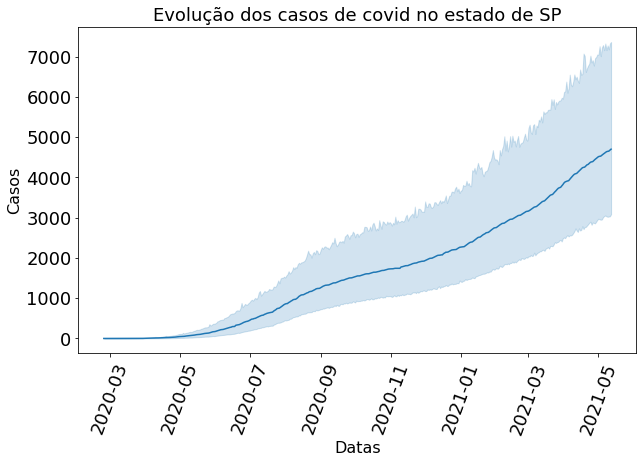

In [5]:
plt.figure(figsize=(10,6))
sns.lineplot(x="datahora",y="casos", data=dados)
plt.title("Evolução dos casos de covid no estado de SP", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Casos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Analisando os dados da cidade de São José dos Campos

In [6]:
dados_sjc = dados.query('nome_munic == "São José dos Campos"')

Queremos verificar se o crescimento dos casos de covid é um crescimento exponencial. Para isso, iremos transformar a escala do eixo y (casos) em uma escala logarítmica. Quando você faz essa transformação para escala log e o resultado é uma reta crescente podemos concluir que os resultados tem crescimento exponencial.

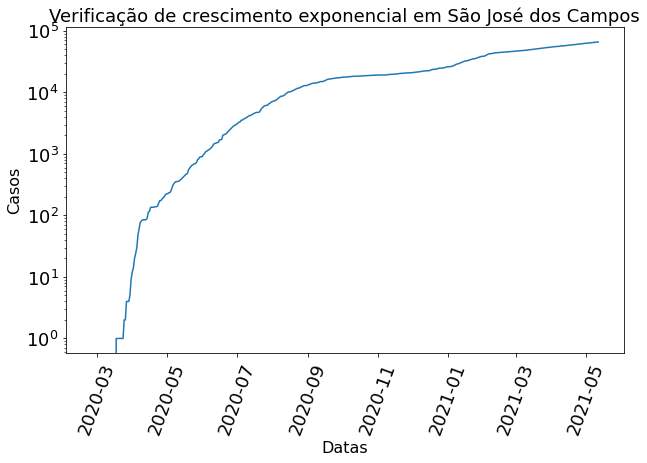

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(x="datahora", y= "casos", data = dados_sjc)
mpl.pyplot.yscale('log')
plt.title("Verificação de crescimento exponencial em São José dos Campos", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Casos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Olhando para os dados de SJC percebemos que é uma curva, o que não deixa de ser um crescimento exponencial porém com mudanças no padrão de crescimento. Se fosse uma reta seria um crescimento exponencial perfeito.

A escala logaritmica é usada para diminuir possiveis efeitos de viés e outliers.

Agora iremos olhar para os números de novos casos diários de covid.

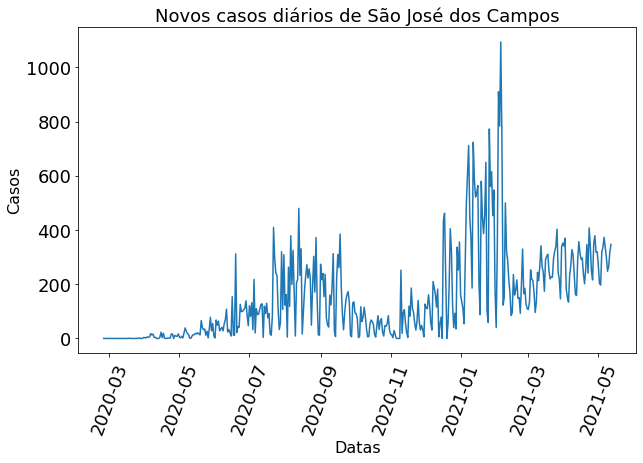

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(x="datahora", y= "casos_novos", data = dados_sjc)
plt.title("Novos casos diários de São José dos Campos", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Casos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Iremos olhar para a taxa de crescimento, ou seja, diferença de novos casos a cada dia.

Um ponto de atenção é que o número de casos informados não necessariamente acontece no mesmo dia, por exemplo, números dos finais de semana podem ser registrados na próxima semana devido não ter expediente.

In [9]:
dados_sjc['taxa_de_crescimento_casos'] = dados_sjc['casos_novos'].diff()
dados_sjc['taxa_de_crescimento_obitos'] = dados_sjc['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


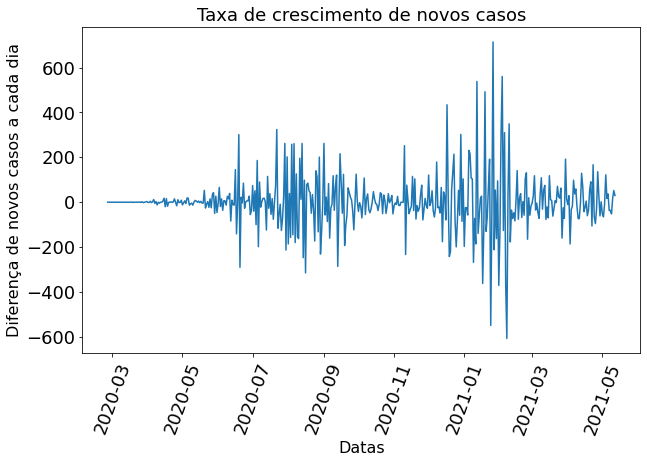

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(x="datahora", y= "taxa_de_crescimento_casos", data = dados_sjc)
plt.title("Taxa de crescimento de novos casos", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Diferença de novos casos a cada dia", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Olhando para o gráficos da taxa de crescimento de casos e óbitos, há uma certa semelhança, porém, é dificil ter uma correlação olhando para um dia específico pois o óbito pode acontecer em um dia diferente da notificação do caso.

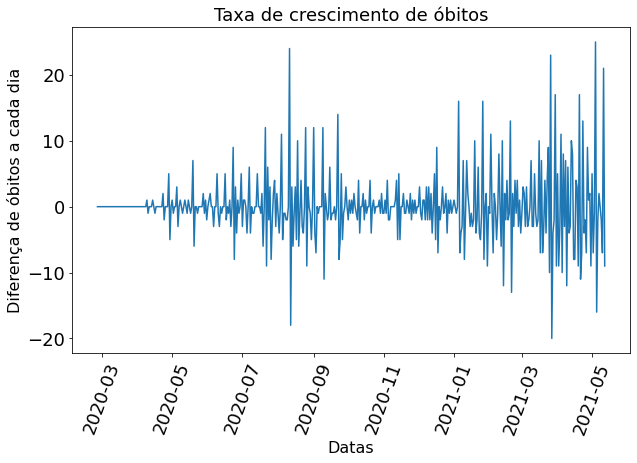

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(x="datahora", y= "taxa_de_crescimento_obitos", data = dados_sjc)
plt.title("Taxa de crescimento de óbitos", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Diferença de óbitos a cada dia", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Pegando os dados só de 2021

In [12]:
dados_sjc['ano'] = pd.DatetimeIndex(dados_sjc['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
dados_2021 = dados_sjc.query('ano == "2021"')

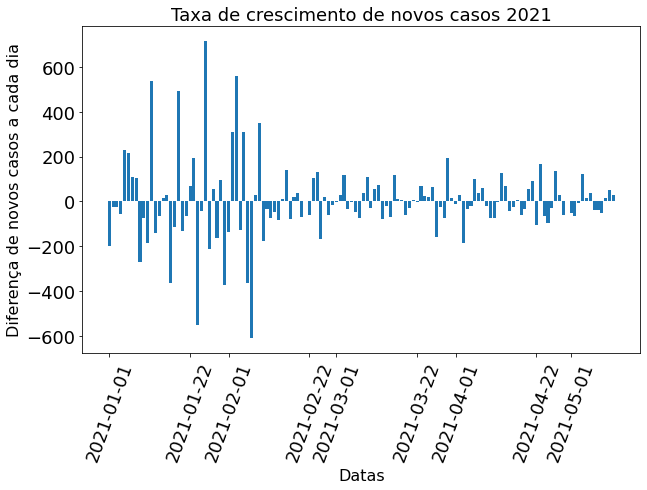

In [14]:
plt.figure(figsize=(10,6))
plt.bar(dados_2021['datahora'],dados_2021['taxa_de_crescimento_casos'])
plt.title("Taxa de crescimento de novos casos 2021", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Diferença de novos casos a cada dia", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Calculando a média móvel dos novos casos, onde é feita uma média dos últimos 7 dias.

A média móvel serve para suavizar os picos e diminui o efeito da sazonalidade, por exemplo, casos de finais de semana são registrados na segunda, ocasionando um maior número de casos na segunda e menor nos finais de semana. Assim, a média móvel diminiu esse efeito minimizando esses picos mostrando de uma maneira mais fiel a tendencia do gráfico.

In [15]:
dados_sjc['media_movel_casos'] = dados_sjc['casos_novos'].rolling(window=7,center=False).mean()
dados_sjc['media_movel_obitos'] = dados_sjc['obitos_novos'].rolling(window=7,center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


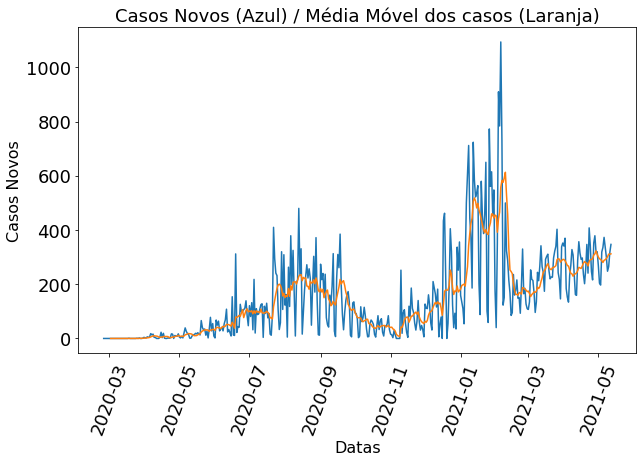

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x='datahora',y='casos_novos',data=dados_sjc)
sns.lineplot(x='datahora',y='media_movel_casos',data=dados_sjc)
plt.title("Casos Novos (Azul) / Média Móvel dos casos (Laranja)", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Casos Novos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Analisando os dados de janeiro e fevereiro de 2021, percebe se que há uma sazonalidade nos finais de semana e no início de janeiro.

In [17]:
import numpy as np

In [18]:
dados_202101 = dados_sjc.query('mes == 1 & ano == 2021')
dados_202102 = dados_sjc.query('mes == 2 & ano == 2021')

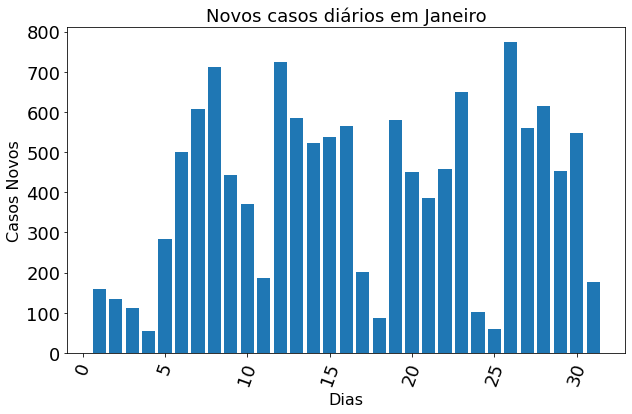

In [19]:
plt.figure(figsize=(10,6))
plt.bar(np.linspace(1,31,31),dados_202101['casos_novos'])
plt.title("Novos casos diários em Janeiro", fontsize=18)
plt.xlabel("Dias", fontsize=16)
plt.ylabel("Casos Novos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

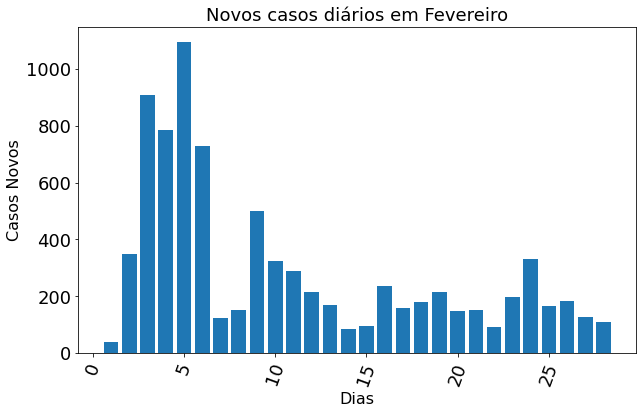

In [20]:
plt.figure(figsize=(10,6))
plt.bar(np.linspace(1,28,28),dados_202102['casos_novos'])
plt.title("Novos casos diários em Fevereiro", fontsize=18)
plt.xlabel("Dias", fontsize=16)
plt.ylabel("Casos Novos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Fazendo previsões usando o Prophet

In [21]:
df = pd.DataFrame()

In [22]:
df['ds'] = dados_sjc['datahora']

In [23]:
df['y'] = dados_sjc['casos_novos']

In [24]:
from fbprophet import Prophet

In [25]:
modelo = Prophet()

In [26]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [28]:
previsao = modelo.predict(dataframefuturo)

In [29]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-18.660426,-156.911075,150.751613,-18.660426,-18.660426,20.602499,20.602499,20.602499,20.602499,20.602499,20.602499,0.0,0.0,0.0,1.942074
1,2020-02-26,-17.907191,-127.823059,177.659202,-17.907191,-17.907191,39.302861,39.302861,39.302861,39.302861,39.302861,39.302861,0.0,0.0,0.0,21.395670
2,2020-02-27,-17.153956,-130.319631,192.160940,-17.153956,-17.153956,42.046295,42.046295,42.046295,42.046295,42.046295,42.046295,0.0,0.0,0.0,24.892339
3,2020-02-28,-16.400721,-120.181115,188.003203,-16.400721,-16.400721,45.816584,45.816584,45.816584,45.816584,45.816584,45.816584,0.0,0.0,0.0,29.415863
4,2020-02-29,-15.647486,-168.224495,149.648966,-15.647486,-15.647486,9.850799,9.850799,9.850799,9.850799,9.850799,9.850799,0.0,0.0,0.0,-5.796687


Os pontos pretos são os dados reais e estamos tentando ajustar o modelo a esses pontos através da curva azul escura. 

A região azul mais clara é o intervalo de confiança. Note que o modelo vai mais 30 dias pra frente do que os dados reais, essa é previsão.

<Figure size 720x432 with 0 Axes>

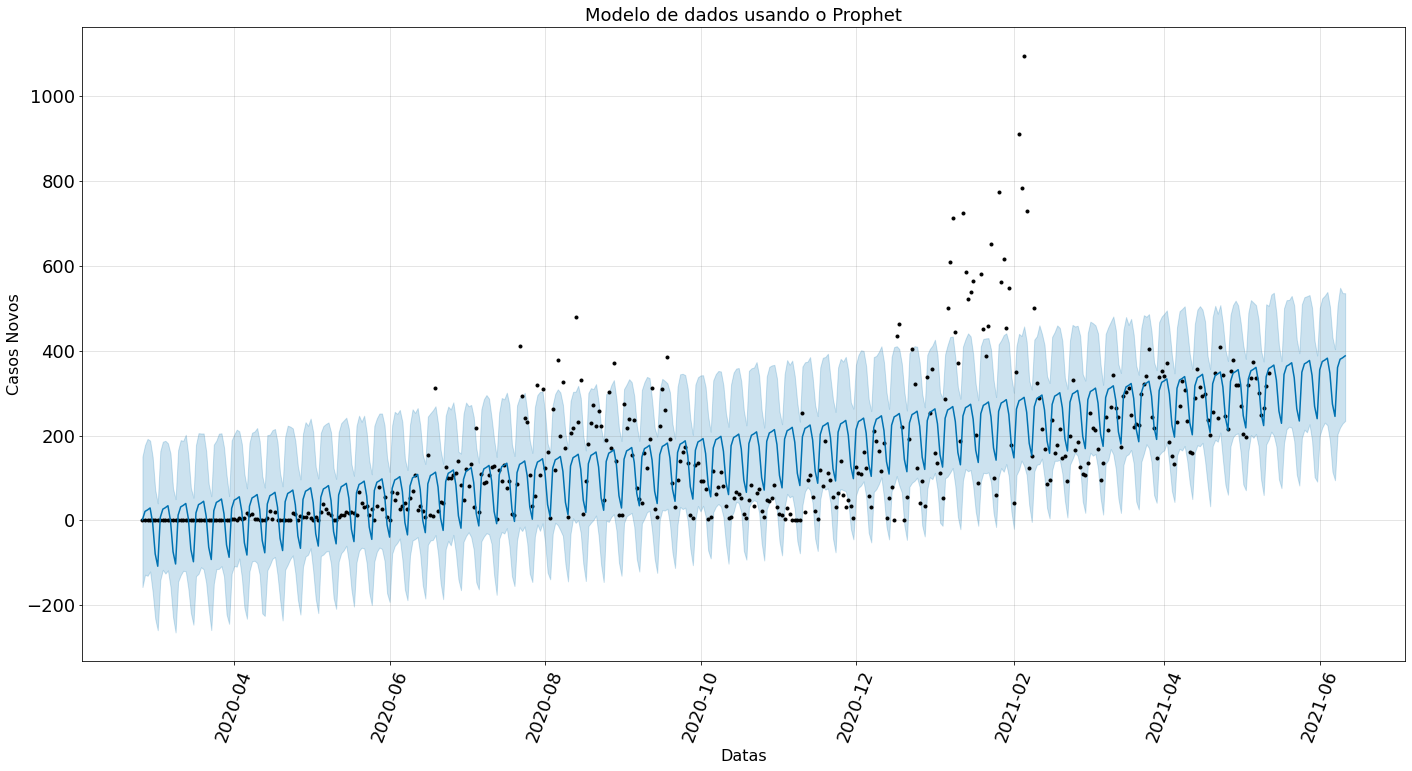

In [30]:
plt.figure(figsize=(10,6))
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.title("Modelo de dados usando o Prophet", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Casos Novos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()

Iremos agora dividir nossa base de dados em dados de teste e dados de treino.

In [31]:
df = pd.DataFrame()
df['ds'] = dados_sjc['datahora'][:400]
df['y'] =dados_sjc['casos_novos'][:400]

In [32]:
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sjc['datahora'][400:]
df_teste['y'] =dados_sjc['casos_novos'][400:]

<Figure size 720x432 with 0 Axes>

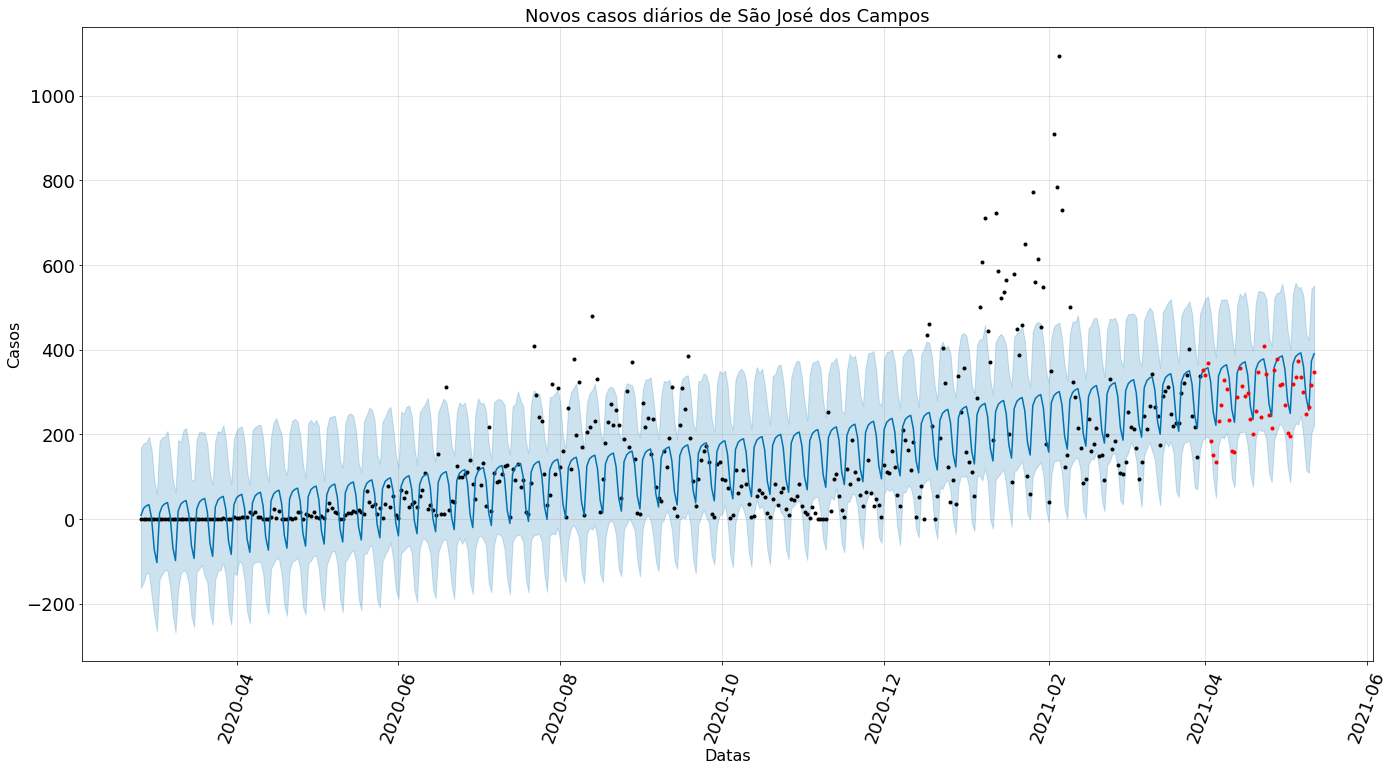

In [34]:
plt.figure(figsize=(10,6))
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.title("Novos casos diários de São José dos Campos", fontsize=18)
plt.xlabel("Datas", fontsize=16)
plt.ylabel("Casos", fontsize=16)
plt.xticks(rotation = 70)
plt.show()


Abaixo é exibido os componentes do prophet, ele decompõe o gráfico original em duas componentes como trend e identificação de sazonalidade.

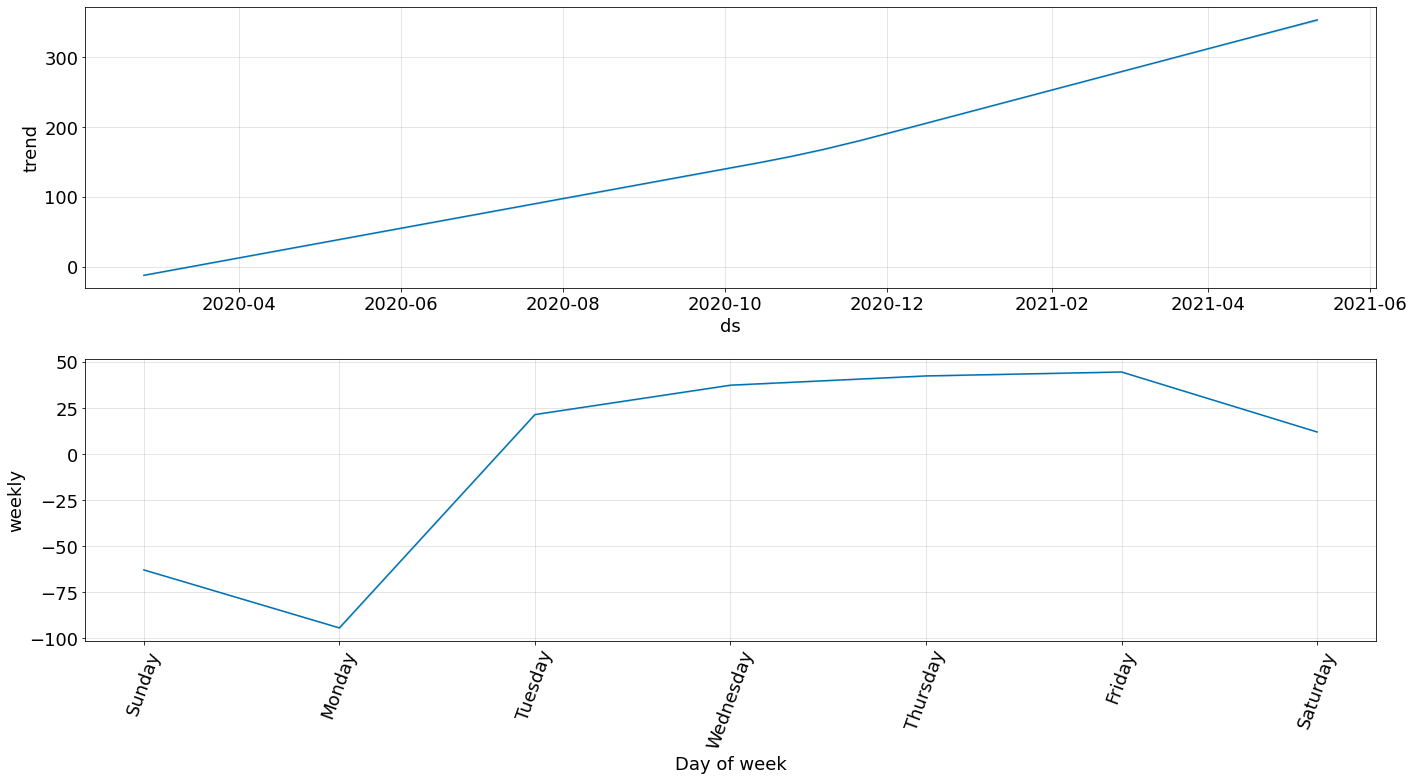

In [35]:
modelo.plot_components(previsao, figsize=(20,10))
plt.xticks(rotation='70'); #olhar rotação

Adicionando checkpoints para análise da mudança de tendência.

In [36]:
from fbprophet.plot import add_changepoints_to_plot

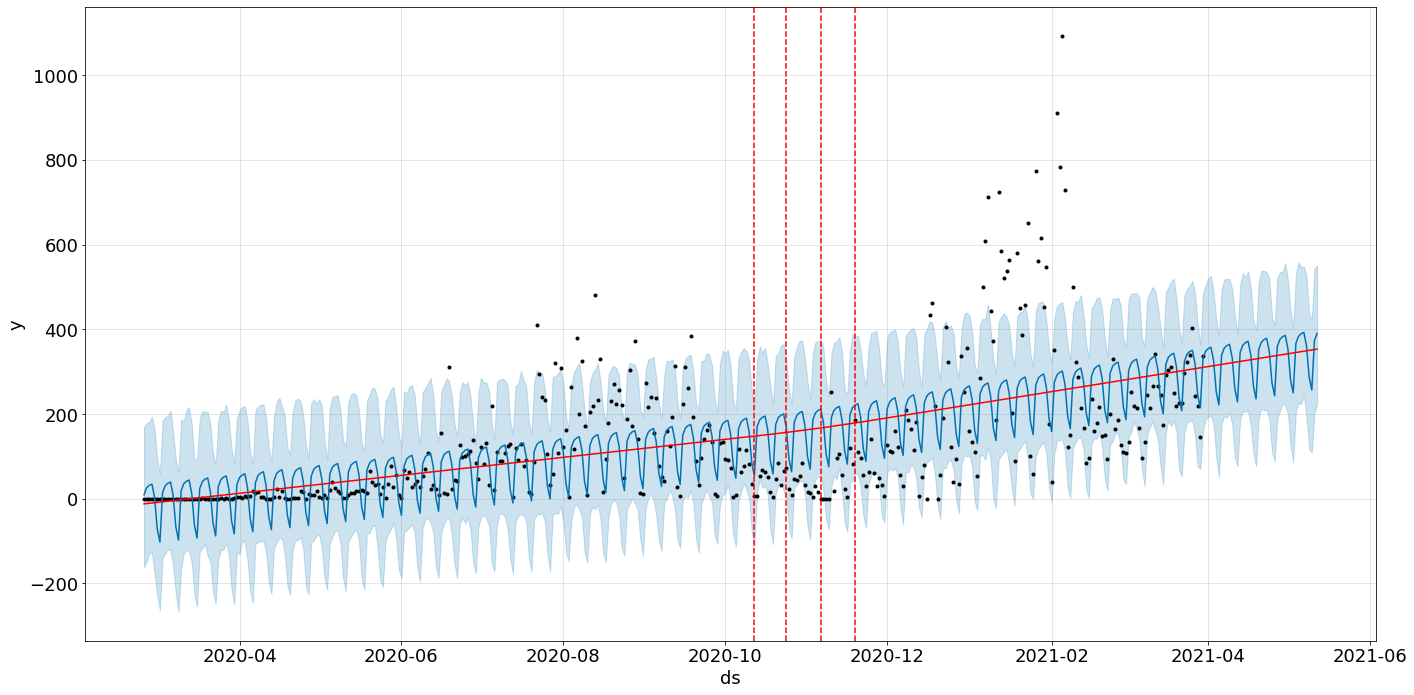

In [37]:
fig = modelo.plot(previsao, figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

change prior scale -> aumenta a flexibilidade de enxergarmos os check points, é como se fosse uma lupa. 
A linha vermelha acima é aquela componente tendencia

In [38]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0) #default = 0.05
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=36)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


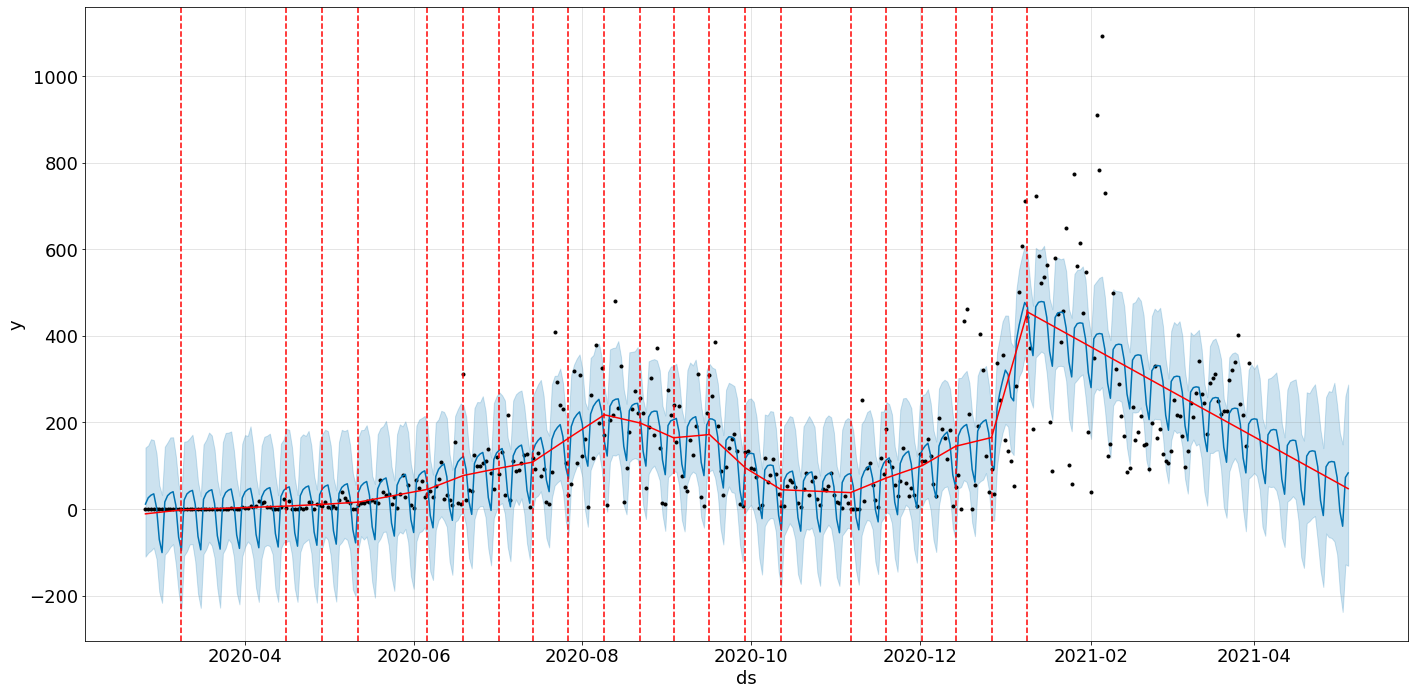

In [39]:
fig = modelo.plot(previsao, figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [40]:
modelo = Prophet(changepoints=['2020-12-31'])
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=36)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


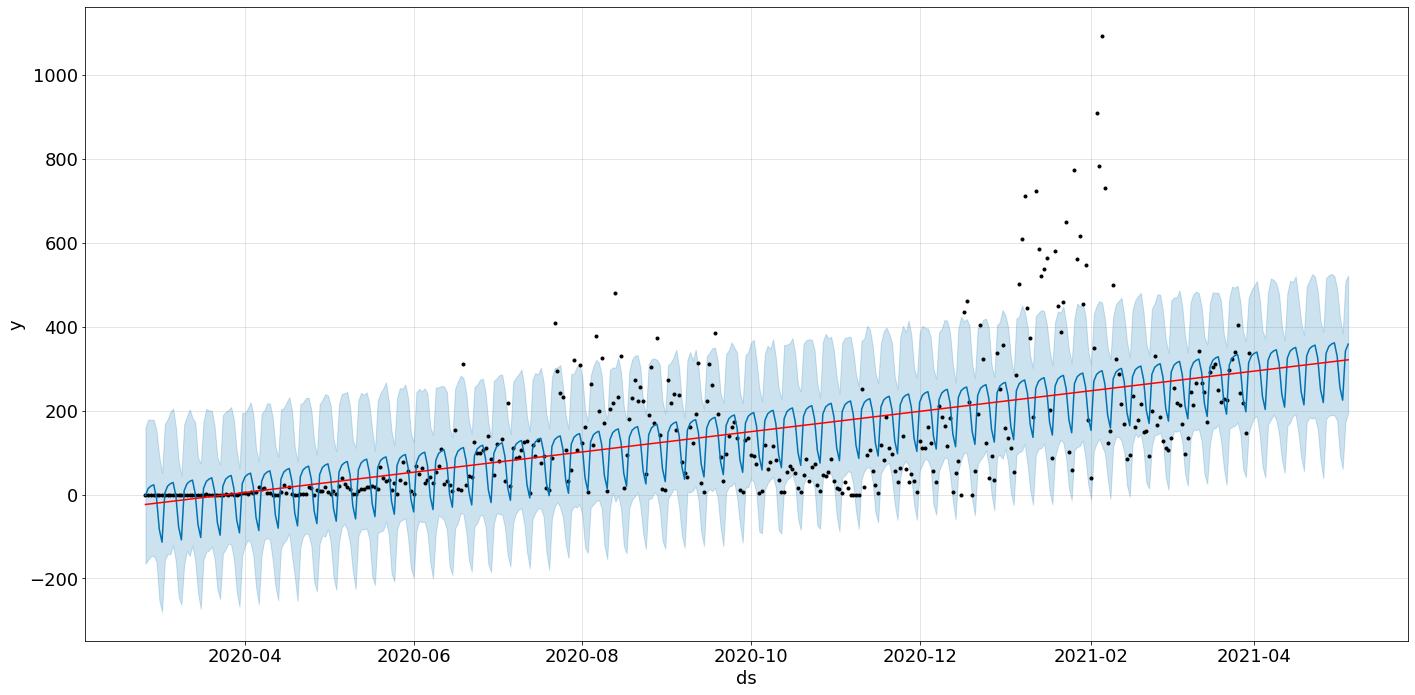

In [41]:
fig = modelo.plot(previsao, figsize=(20,10));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

olhando para feriados e sazonalidades

In [42]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0) #default = 0.05

In [43]:
# Usando os feriados normais do país
modelo.add_country_holidays(country_name='BR')

In [44]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
dataframefuturo = modelo.make_future_dataframe(periods=36)
previsao = modelo.predict(dataframefuturo)

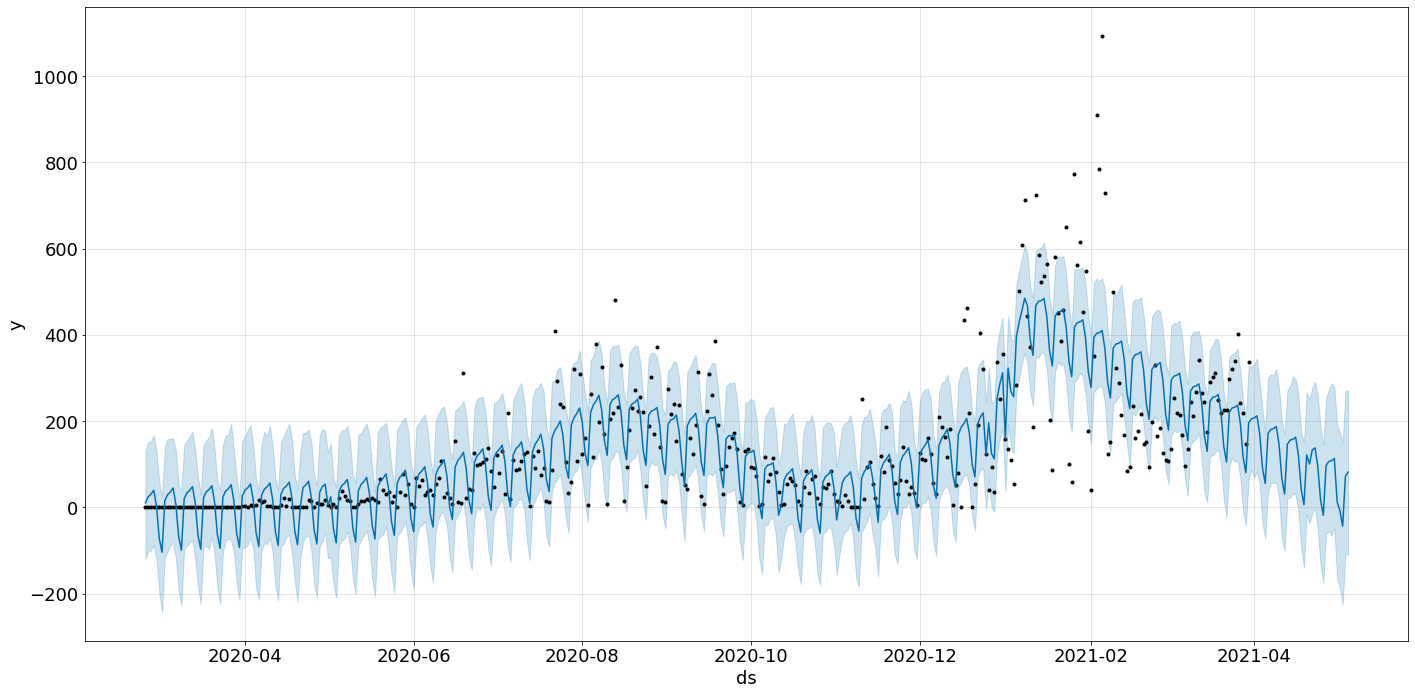

In [46]:
fig = modelo.plot(previsao, figsize=(20,10));

In [80]:
#Usando feriados especificos do municipio de SJC

feriados_sjc_2020 = [
'2020-03-19',
'2020-03-20',
'2020-04-10',
'2020-04-20',
'2020-04-21',
'2020-05-01',
'2020-06-11',
'2020-06-12',
'2020-07-09',
'2020-07-10',
'2020-07-27',
'2020-09-07',
'2020-10-12', 
'2020-12-25'
]

feriados_sjc_2021 = [
'2021-01-01',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-19',
'2021-04-02',
'2021-05-01',
'2021-06-03',
'2021-06-04',
'2021-07-09',
]


feriados_sjc_2020 = pd.DataFrame({
  'holiday': 'sjc_2020',
  'ds': pd.to_datetime(feriados_sjc_2020)
})

feriados_sjc_2021 = pd.DataFrame({
  'holiday': 'sjc_2021',
  'ds': pd.to_datetime(feriados_sjc_2021)
})

feriados = pd.concat((feriados_sjc_2020, feriados_sjc_2021))

In [81]:
# Usando os feriados do município de SJC


modelo_feriados = Prophet(n_changepoints = 25, changepoint_prior_scale=10.0, holidays=feriados)
modelo_feriados.fit(df)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=36)
previsao = modelo_feriados.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


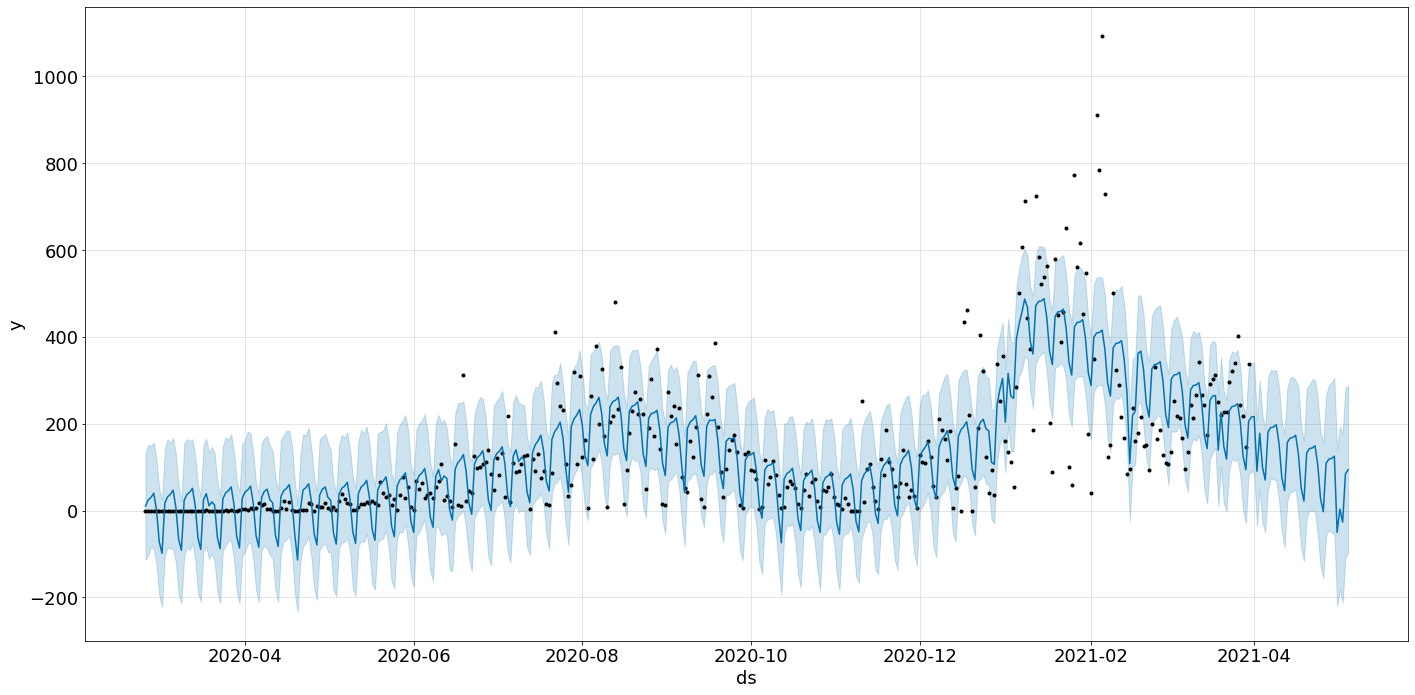

In [49]:
fig = modelo_feriados.plot(previsao, figsize=(20,10));

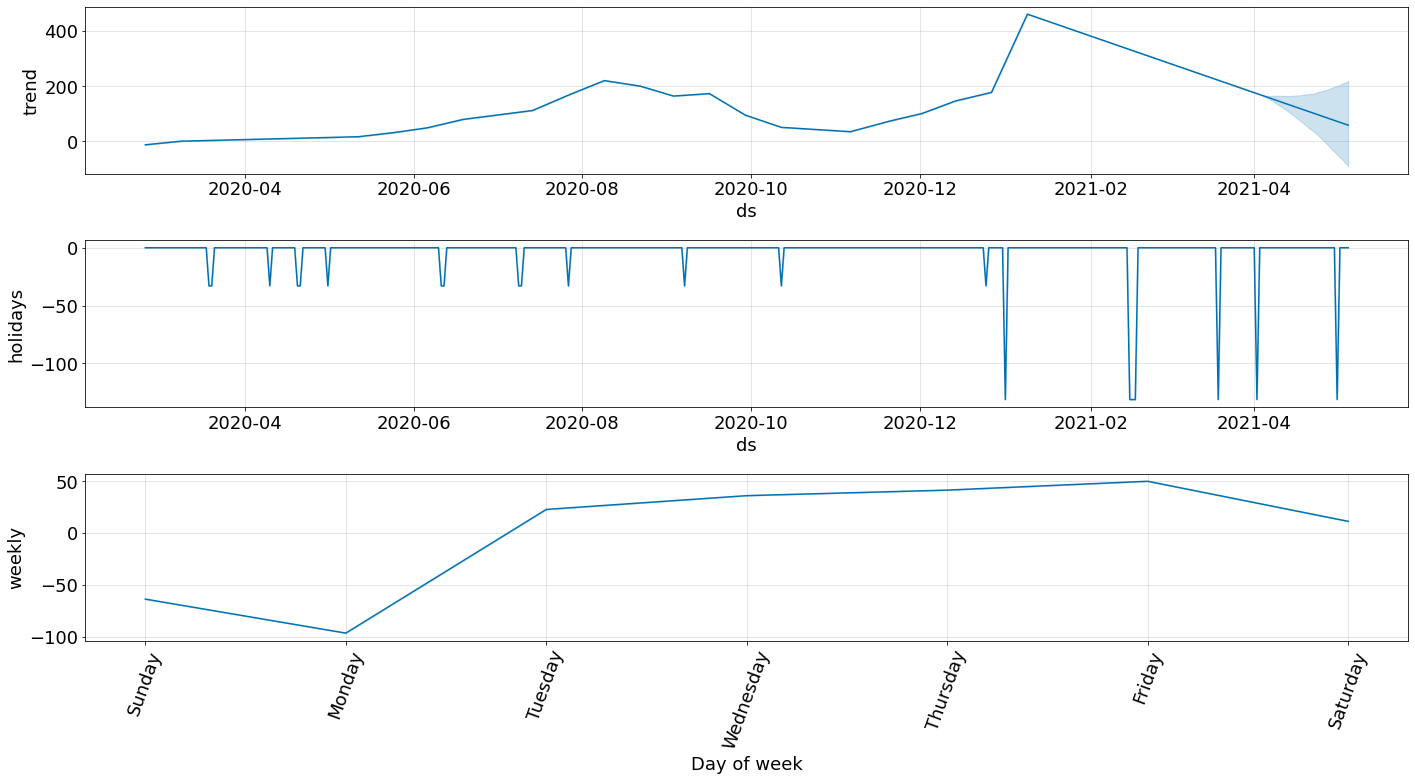

In [50]:
modelo.plot_components(previsao, figsize=(20,10))
plt.xticks(rotation='70'); #olhar rotação

##**Sazonalidade**

In [51]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative',holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


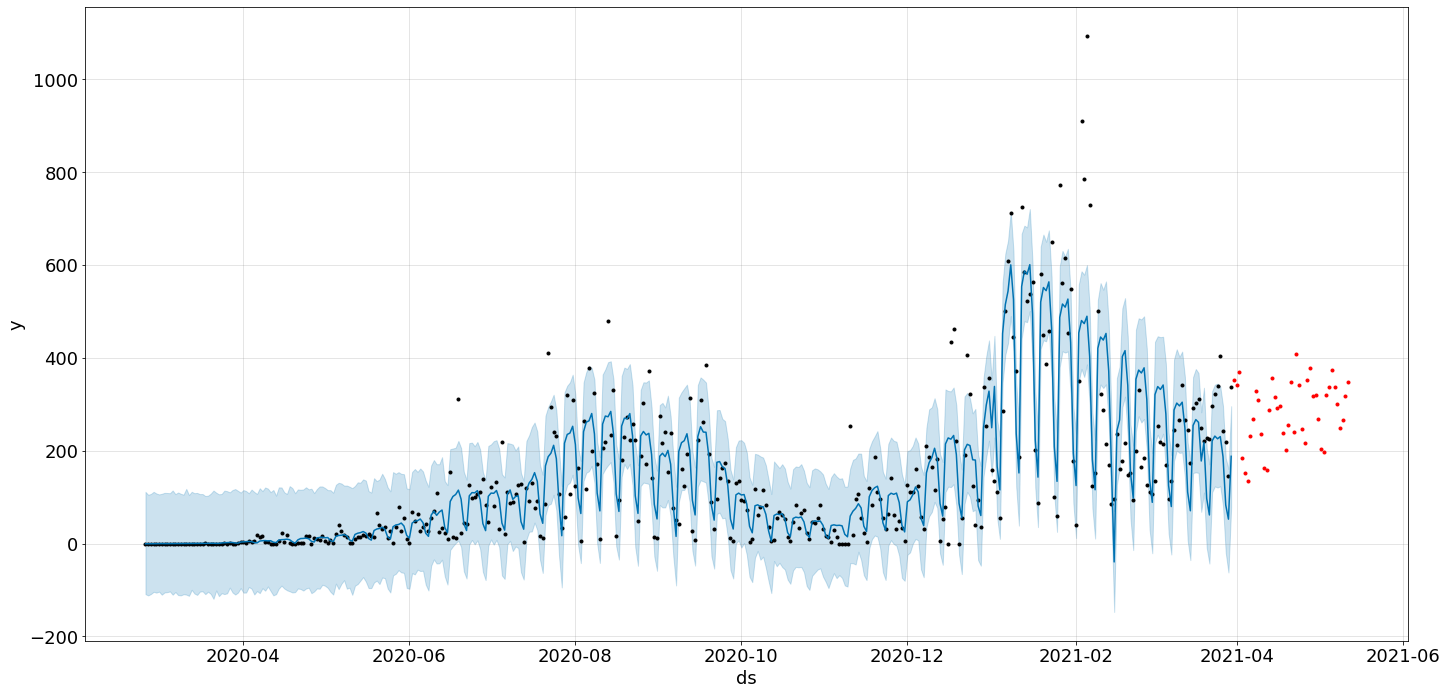

In [52]:
fig = modelo.plot(previsao, figsize=(20,10));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
#Sazonalidade aditiva
mean_absolute_error(df['y'],previsao['yhat'])

50.51614269029664

In [55]:
#Sazonalidade multiplicativa
mean_absolute_error(df['y'],previsao['yhat'])

50.51614269029664

##**Outliers e validação**

In [56]:
novo_y = df.reset_index()

In [57]:
sem_outliers = novo_y[(novo_y['y']> previsao['yhat_lower']) & (novo_y['y'] < previsao['yhat_upper'])]

In [58]:
sem_outliers

,index,ds,y
0,557,2020-02-25,0
1,1202,2020-02-26,0
2,1847,2020-02-27,0
3,2492,2020-02-28,0
4,3137,2020-02-29,0
...,...,...,...
392,253397,2021-03-23,297
393,254042,2021-03-24,322
394,254687,2021-03-25,340
396,255977,2021-03-27,243


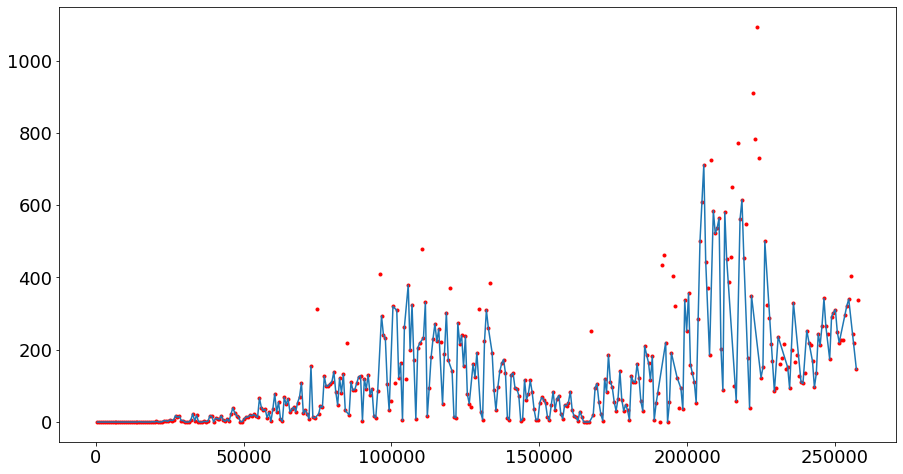

In [59]:
plt.plot(df.index, df['y'],'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [60]:
df_sem_outliers = sem_outliers[['ds','y']]

In [61]:
df_sem_outliers

,ds,y
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,0
...,...,...
392,2021-03-23,297
393,2021-03-24,322
394,2021-03-25,340
396,2021-03-27,243


In [62]:
modelo = Prophet(n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


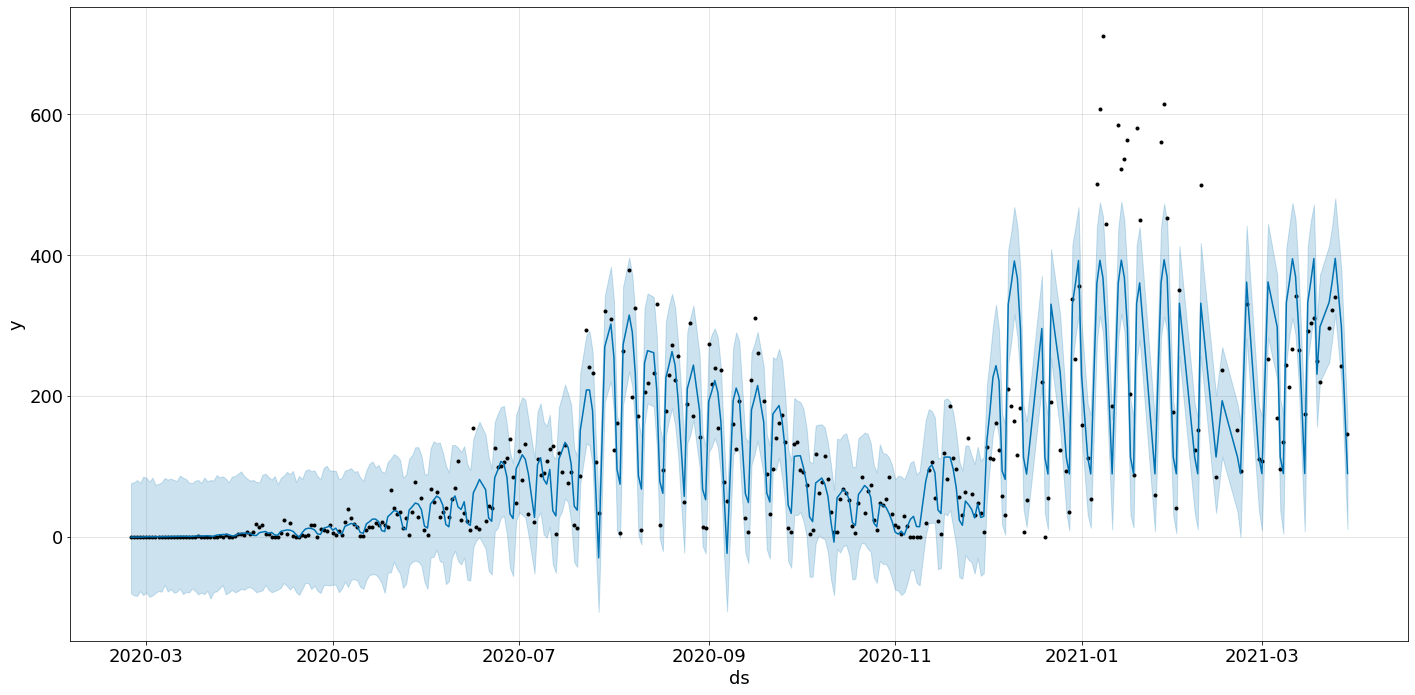

In [63]:
fig = modelo.plot(previsao, figsize=(20,10));

##**Intervalo de confiança**

In [64]:
modelo = Prophet(interval_width=0.80, n_changepoints = 25 ,changepoint_prior_scale=10.0, seasonality_mode='multiplicative', holidays=feriados, weekly_seasonality=7) #'multiplicative' 'additive'
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=30)
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


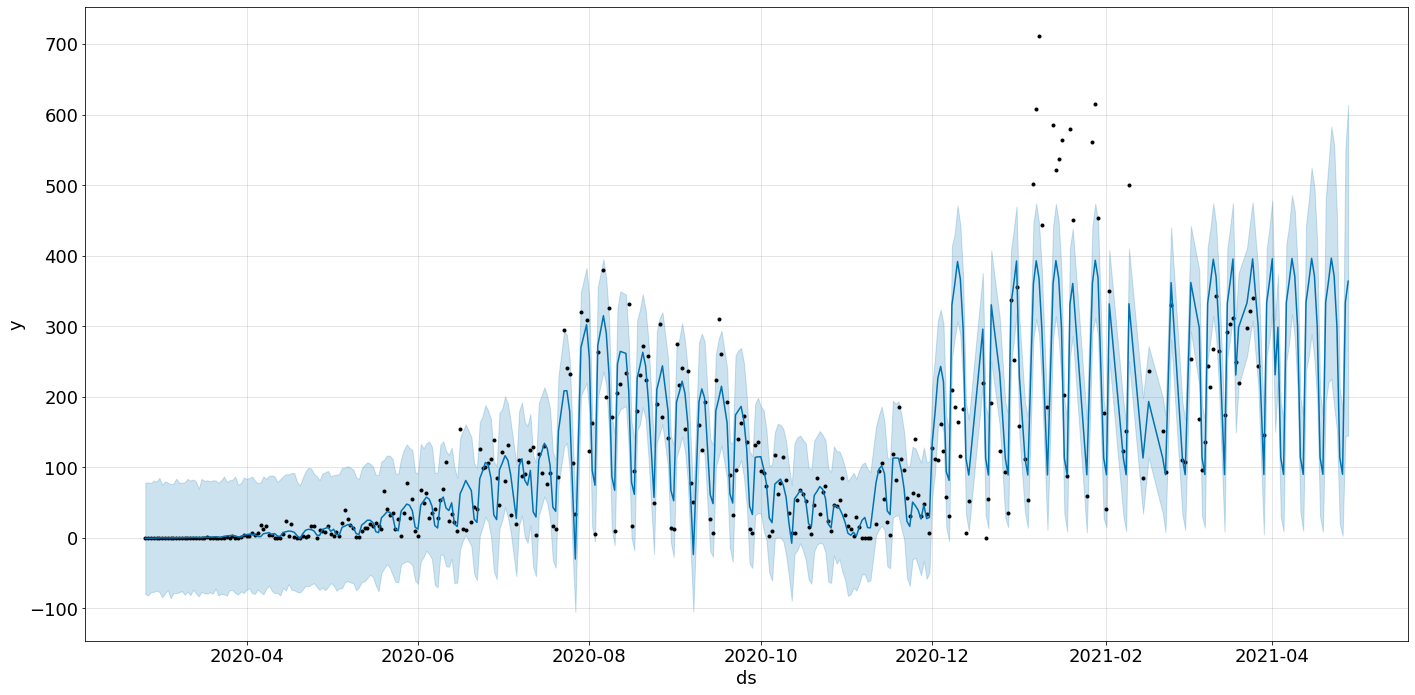

In [65]:
fig = modelo.plot(previsao, figsize=(20,10));

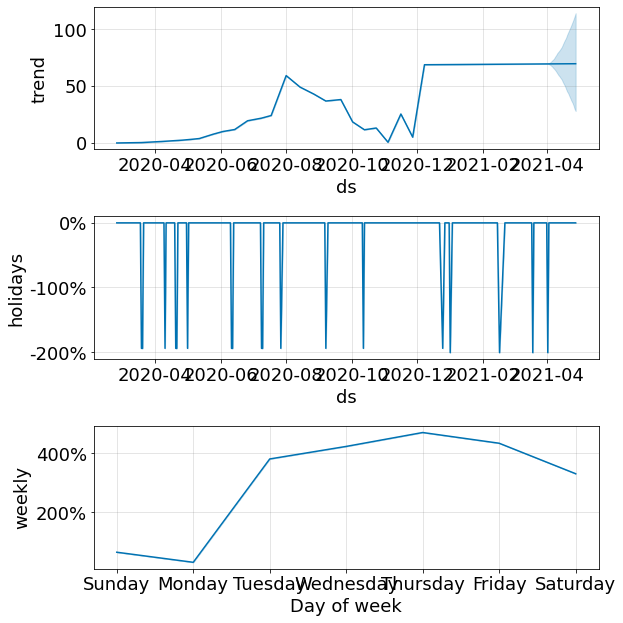

In [66]:
modelo.plot_components(previsao);

In [67]:
amostras = modelo.predictive_samples(previsao)

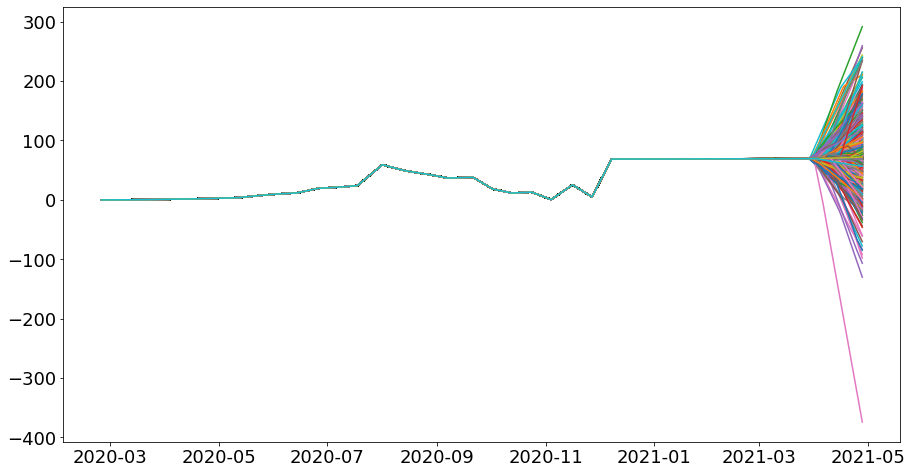

In [68]:
plt.plot(previsao['ds'],amostras['trend']);

##**Validação**

In [69]:
from fbprophet.diagnostics import cross_validation

In [70]:
df_cv = cross_validation(modelo, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [71]:
df_cv['cutoff'].unique()

array(['2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-11-29T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [72]:
janela = 5 #mudar o valor da janela para verificar as janelas utilizadas para a validação dos resultados.

In [73]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

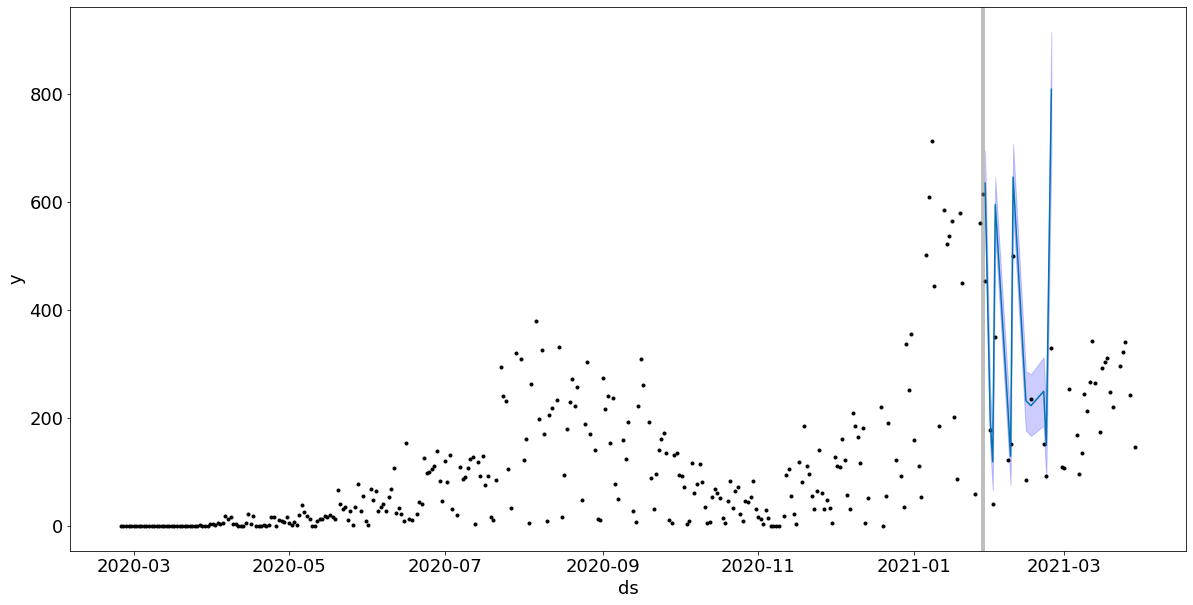

In [74]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [75]:
from fbprophet.diagnostics import performance_metrics

In [76]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [77]:
df_p

,horizon,mse,rmse,mae,mdape,coverage
0,3 days,3693.486568,60.774062,47.115084,0.360279,0.607143
1,4 days,14555.035149,120.644250,67.718942,0.397448,0.541667
2,5 days,17848.077211,133.596696,76.826739,0.597352,0.541667
3,6 days,15516.531461,124.565370,67.378281,0.530466,0.604167
4,7 days,27367.922646,165.432532,76.841458,0.488520,0.687500
5,8 days,28620.789980,169.176801,83.444899,0.498065,0.604167
6,9 days,36942.248357,192.203664,110.582522,0.658381,0.500000
7,10 days,42083.615907,205.142916,136.441758,0.658381,0.387500
8,11 days,54856.840541,234.215372,156.175660,0.515217,0.406250
9,12 days,71039.047740,266.531514,170.360381,0.609431,0.464286


In [78]:
from fbprophet.plot import plot_cross_validation_metric

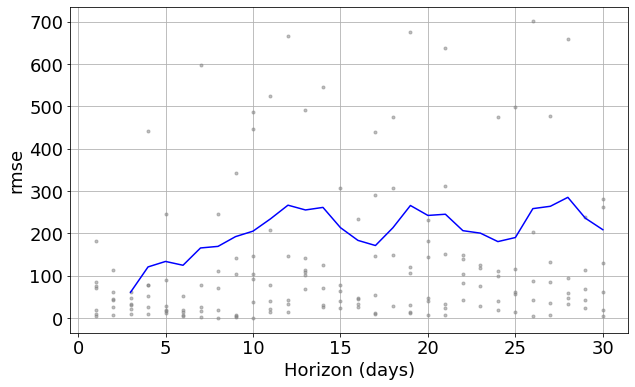

In [79]:
fig = plot_cross_validation_metric(df_cv,metric='rmse') #rmse